# Importation des données

##Chargement drive

In [1]:
pip install dbfread

In [2]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dbfread import DBF
from os import listdir
from os.path import isfile, join
from shapely import line_merge, MultiLineString
from shapely.geometry import Point, MultiPoint
from shapely.geometry import Polygon, MultiPolygon
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
import math
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

# il vous faut ajouter un raccourci du dossier partagé dans votre drive (clique droit sur PIP_2024_G5 -> Organiser -> Ajouter un raccourci -> Mon Drive)

Mounted at /content/drive


##Chargement des données

In [4]:
Chemin_Donnees : str = "/content/drive/MyDrive/PIP2025_G8/Donnees/DonneesBrutes/Bornes_recharge/"

bornes = "Bornes_nettoye.csv"  # Mettre le chemin du fichier dans le path


fichiers_csv = [f for f in os.listdir(Chemin_Donnees) if f.endswith('.csv')] # Noms des CSV du dossier
bornes = pd.read_csv(Chemin_Donnees + fichiers_csv[2], sep=';', low_memory=False)

bornes.head()

nom_amenageur  siren_amenageur           contact_amenageur  \
0  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   
1  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   
2  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   
3  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   
4  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   

     nom_operateur           contact_operateur telephone_operateur  \
0  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   
1  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   
2  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   
3  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   
4  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   

      nom_enseigne id_station_itinerance id_station_local      nom_station  \
0  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   
1  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   
2  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   
3  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   
4  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   

   ... consolidated_is_code_insee_verified coord_long  coord_lat CodePostal  \
0  ...                                True   1.407644  43.628261    31100.0   
1  ...                                True   1.407644  43.628261    31100.0   
2  ...                                True   1.407644  43.628261    31100.0   
3  ...                                True   1.407644  43.628261    31100.0   
4  ...                                True   1.407644  43.628261    31100.0   

   Departement     Region   Annee                    geometry code_insee  \
0         31.0  Occitanie  2024.0  POINT (1.407644 43.628261)      31555   
1         31.0  Occitanie  2024.0  POINT (1.407644 43.628261)      31555   
2         31.0  Occitanie  2024.0  POINT (1.407644 43.628261)      31555   
3         31.0  Occitanie  2024.0  POINT (1.407644 43.628261)      31555   
4         31.0  Occitanie  2024.0  POINT (1.407644 43.628261)      31555   

    commune  
0  Toulouse  
1  Toulouse  
2  Toulouse  
3  Toulouse  
4  Toulouse  

[5 rows x 60 columns]

In [5]:
vehicules=pd.read_csv("/content/drive/MyDrive/PIP2025_G8/Donnees/Autres données/nb_voiture_annee_cdr.csv")
vehicules.head()

<ipython-input-5-4874221a7644>:1: DtypeWarning: Columns (0,8) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicules=pd.read_csv("/content/drive/MyDrive/PIP2025_G8/Donnees/Autres données/nb_voiture_annee_cdr.csv")


codgeo                   libgeo date_arrete  nb_vp_rechargeables_el  \
0  01001  L'ABERGEMENT-CLÉMENCIAT  2020-12-31                       6   
1  01001  L'ABERGEMENT-CLÉMENCIAT  2021-12-31                       8   
2  01001  L'ABERGEMENT-CLÉMENCIAT  2022-12-31                      10   
3  01001  L'ABERGEMENT-CLÉMENCIAT  2023-12-31                      14   
4  01001  L'ABERGEMENT-CLÉMENCIAT  2024-06-30                      21   

   nb_vp_rechargeables_gaz  nb_vp  annee  trimestre code_dep nom_departement  \
0                        0    881   2020          4       01             Ain   
1                        0    890   2021          4       01             Ain   
2                        0    920   2022          4       01             Ain   
3                        0    943   2023          4       01             Ain   
4                        0    957   2024          2       01             Ain   

             nom_region  code_region  
0  Auvergne-Rhône-Alpes           84  
1  Auvergne-Rhône-Alpes           84  
2  Auvergne-Rhône-Alpes           84  
3  Auvergne-Rhône-Alpes           84  
4  Auvergne-Rhône-Alpes           84

In [6]:
Chemin_Donnees : str = "/content/drive/MyDrive/PIP2025_G8/Donnees/DonneesBrutes/Population/Recensement/"
fichiers_csv = [f for f in os.listdir(Chemin_Donnees) if f.endswith('.csv')] # Noms des CSV du dossier
print(fichiers_csv)

['donnees_communes.csv', 'correspondance-code-insee-code-postal.csv', 'POPULATION_MUNICIPALE_COMMUNES_FRANCE.csv', 'recensementNettoye.csv']


In [7]:
corr = pd.read_csv(Chemin_Donnees + fichiers_csv[1], sep=';', low_memory=False)
corr.head()

Code INSEE Code Postal       Commune               Département  \
0      66033       66300       CAMELAS   ['PYRENEES-ORIENTALES']   
1      64254       64370    HAGETAUBIN  ['PYRENEES-ATLANTIQUES']   
2      47260       47270  SAINT-MAURIN        ['LOT-ET-GARONNE']   
3      80118       80150     BOUFFLERS                 ['SOMME']   
4      46147       46220    LAGARDELLE                   ['LOT']   

                     Région              Statut  Altitude Moyenne  Superficie  \
0  ['LANGUEDOC-ROUSSILLON']  ['Commune simple']             256.0      1299.0   
1             ['AQUITAINE']  ['Commune simple']             106.0      1874.0   
2             ['AQUITAINE']  ['Commune simple']             143.0      2187.0   
3              ['PICARDIE']  ['Commune simple']              50.0       557.0   
4         ['MIDI-PYRENEES']  ['Commune simple']             110.0       317.0   

   Population                            geo_point_2d  \
0         0.4  42.639460715710925, 2.6889148905394613   
1         0.5  43.510561909594024, -0.612895161323306   
2         0.5   44.21584680376108, 0.8936370457330151   
3         0.1    50.25894479050434, 2.021288658965274   
4         0.1    44.48709070580215, 1.170693334968643   

                                           geo_shape  ID Geofla  Code Commune  \
0  {"coordinates": [[[2.673016106975883, 42.61202...      35535            33   
1  {"coordinates": [[[-0.5869934199585, 43.487993...        905           254   
2  {"coordinates": [[[0.9031113551375021, 44.1900...        750           260   
3  {"coordinates": [[[2.041095653892836, 50.24688...      26556           118   
4  {"coordinates": [[[1.180099496531688, 44.47195...      34133           147   

   Code Canton  Code Arrondissement Code Département  Code Région  
0           17                    2               66           91  
1            3                    3               64           72  
2            4                    1               47           72  
3           19                    1               80           22  
4           23                    1               46           73

#Croisement entre voiture et borne

###En fonction des régions

In [8]:
unique_values = vehicules['code_region'].unique()
sorted_list = sorted(unique_values)
print(sorted_list)
print(len(sorted_list))

[11, 24, 27, 28, 32, 44, 52, 53, 75, 76, 84, 93, 94]
13


On vérifie qu'il y a bien 13 regions

In [9]:
#Sélection des vehicules seulement pour 2024
vehicules2024 = vehicules[vehicules['annee'] == 2024]

In [10]:
#On regarde le nombre de véhicule par région
resultat=vehicules2024.groupby('code_region')[['nb_vp_rechargeables_el']].sum()
resultat

nb_vp_rechargeables_el
code_region                        
11                           397723
24                            54618
27                            56900
28                            87246
32                           142805
44                           138264
52                            86077
53                            74511
75                           146228
76                           155661
84                           224130
93                           165790
94                            16547

In [11]:
# Jointure sur le code INSEE
df_merged = pd.merge(bornes, corr[['Code INSEE', 'Code Région']],right_on='Code INSEE', left_on='code_insee', how='left')
df_merged = df_merged.drop("code_insee", axis=1)
df_merged.head()

nom_amenageur  siren_amenageur           contact_amenageur  \
0  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   
1  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   
2  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   
3  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   
4  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   

     nom_operateur           contact_operateur telephone_operateur  \
0  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   
1  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   
2  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   
3  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   
4  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   

      nom_enseigne id_station_itinerance id_station_local      nom_station  \
0  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   
1  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   
2  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   
3  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   
4  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   

   ... coord_long  coord_lat CodePostal Departement     Region   Annee  \
0  ...   1.407644  43.628261    31100.0        31.0  Occitanie  2024.0   
1  ...   1.407644  43.628261    31100.0        31.0  Occitanie  2024.0   
2  ...   1.407644  43.628261    31100.0        31.0  Occitanie  2024.0   
3  ...   1.407644  43.628261    31100.0        31.0  Occitanie  2024.0   
4  ...   1.407644  43.628261    31100.0        31.0  Occitanie  2024.0   

                     geometry   commune Code INSEE Code Région  
0  POINT (1.407644 43.628261)  Toulouse      31555        73.0  
1  POINT (1.407644 43.628261)  Toulouse      31555        73.0  
2  POINT (1.407644 43.628261)  Toulouse      31555        73.0  
3  POINT (1.407644 43.628261)  Toulouse      31555        73.0  
4  POINT (1.407644 43.628261)  Toulouse      31555        73.0  

[5 rows x 61 columns]

On ajoute la correspondance de la région pour chaque borne en fonction de son code INSEE

In [12]:
unique_values = df_merged['Code Région'].unique()
print(unique_values)
print(len(unique_values))

[73. 25. 24. 72. 52. 91. 11. 94. 93. 82. 31. 53. 21. 22. 41. 42. 83. 43.
 26. 54. nan 74. 23.]
23


On a plus de régions que les 13 existantes car on a aussi des codes de région qui n'existe plus.  
Donc on va faire la correspondance entre les anciennes régions et les nouvelles

In [13]:
value_mapping = {
    21: 44,
    22: 32,
    23: 28,
    25: 28,
    26: 27,
    31: 32,
    41: 44,
    42: 44,
    43: 27,
    54: 75,
    72: 75,
    73: 76,
    74: 75,
    82: 84,
    83: 84,
    91: 76
}

# Replace the values in the 'aaa' column based on the mapping
df_merged['Code Région'] = df_merged['Code Région'].replace(value_mapping)
df_merged

nom_amenageur  siren_amenageur  \
0            SOLVEO ENERGIES      508886132.0   
1            SOLVEO ENERGIES      508886132.0   
2            SOLVEO ENERGIES      508886132.0   
3            SOLVEO ENERGIES      508886132.0   
4            SOLVEO ENERGIES      508886132.0   
...                      ...              ...   
109675  CHELONIENS DIFFUSION      421526641.0   
109676        OPTEOR IMMOTIC      552008914.0   
109677           D2 FINANCES      801177528.0   
109678             WeeCharge      902305556.0   
109679    SAFEXIS EUROPE SAS      437854508.0   

                         contact_amenageur        nom_operateur  \
0               bornes@solveo-energies.com      SOLVEO ENERGIES   
1               bornes@solveo-energies.com      SOLVEO ENERGIES   
2               bornes@solveo-energies.com      SOLVEO ENERGIES   
3               bornes@solveo-energies.com      SOLVEO ENERGIES   
4               bornes@solveo-energies.com      SOLVEO ENERGIES   
...                                    ...                  ...   
109675             pierremoisson@orange.fr  LAST MILE SOLUTIONS   
109676  seikou.diakho@vinci-facilities.com            FRESHMILE   
109677        laurent.specht@volta-sas.com            FRESHMILE   
109678                  hello@weecharge.fr            WeeCharge   
109679           philippe.mang@safexis.com            Wellborne   

                           contact_operateur telephone_operateur  \
0                 bornes@solveo-energies.com      05 32 98 01 58   
1                 bornes@solveo-energies.com      05 32 98 01 58   
2                 bornes@solveo-energies.com      05 32 98 01 58   
3                 bornes@solveo-energies.com      05 32 98 01 58   
4                 bornes@solveo-energies.com      05 32 98 01 58   
...                                      ...                 ...   
109675  Olga.Bouthoorn@lastmilesolutions.com                 NaN   
109676            exploitation@freshmile.com          0368781435   
109677            exploitation@freshmile.com      03 68 78 14 35   
109678                    hello@weecharge.fr          0972649769   
109679                  support@wellborne.fr          0782175988   

                nom_enseigne id_station_itinerance  \
0            SOLVEO ENERGIES         DKMONE3785539   
1            SOLVEO ENERGIES         DKMONE3785539   
2            SOLVEO ENERGIES         DKMONE3785539   
3            SOLVEO ENERGIES         DKMONE3785539   
4            SOLVEO ENERGIES         DKMONE3785539   
...                      ...                   ...   
109675           A Cupulatta          Non concerné   
109676  VINCI OPTEOR IMMOTIC          Non concerné   
109677             FRESHMILE          Non concerné   
109678             WeeCharge          Non concerné   
109679               SAFEXIS          Non concerné   

                             id_station_local           nom_station  ...  \
0                                         NaN       Golf de Garonne  ...   
1                                         NaN       Golf de Garonne  ...   
2                                         NaN       Golf de Garonne  ...   
3                                         NaN       Golf de Garonne  ...   
4                                         NaN       Golf de Garonne  ...   
...                                       ...                   ...  ...   
109675                                    NaN          A Cupulatata  ...   
109676   74547d48-2597-4024-a46c-2399260c18f4  VINCI OPTEOR IMMOTIC  ...   
109677   5aa39699-a74b-42e3-90ce-7167a52af169            D2 FINANCE  ...   
109678   d3c00913-8774-4df3-8c07-97b5c596db39  Montaigut Le Boulval  ...   
109679                       FRWBCERCG0C21101               SAFEXIS  ...   

       coord_long  coord_lat CodePostal Departement         Region   Annee  \
0        1.407644  43.628261    31100.0        31.0      Occitanie  2024.0   
1        1.407644  43.628261    31100.0        31.0      Occitanie  2024.0   
2       

In [14]:
unique_values = df_merged['Code Région'].unique()
print(unique_values)
print(len(unique_values))

[76. 28. 24. 75. 52. 11. 94. 93. 84. 32. 53. 44. 27. nan]
14


In [15]:
region_codes = {
    "Paris": 11,
    "Marseille": 93,
    "Lyon": 84,
}

# Création de la nouvelle colonne 'cod_reg'
df_merged.loc[df_merged['commune'] == "Paris", 'Code Région'] = 11
df_merged.loc[df_merged['commune'] == "Marseille", 'Code Région'] = 93
df_merged.loc[df_merged['commune'] == "Lyon", 'Code Région'] = 84

In [16]:
# Création de la nouvelle colonne 'cod_reg'
df_merged.loc[df_merged['Region'] == "Île-de-France", 'Code Région'] = 11
df_merged.loc[df_merged['Region'] == "Normandie", 'Code Région'] = 28
df_merged.loc[df_merged['Region'] == "Nouvelle-Aquitaine", 'Code Région'] = 75
df_merged.loc[df_merged['Region'] == "Provence-Alpes-Côte d'Azur", 'Code Région'] = 93
df_merged.loc[df_merged['Region'] == "Bretagne", 'Code Région'] = 53
df_merged.loc[df_merged['Region'] == "Corse", 'Code Région'] = 94

On avait certaine borne qui n'avaient pas de code INSEE donc on a pas pu les lier à une région mais on a soit la commune soit le nom de la région ce qui nous permet de leurs attribuer un code région

In [17]:
lignes_nulles = df_merged[df_merged['Code Région'].isnull()]
lignes_nulles

nom_amenageur  siren_amenageur                contact_amenageur  \
45898  CSE-Central BDF      775657463.0  jacky.degroise@banque-france.fr   
45899  CSE-Central BDF      775657463.0  jacky.degroise@banque-france.fr   
95932          DRIVECO              NaN              support@driveco.com   
95933          DRIVECO              NaN              support@driveco.com   
95934          DRIVECO              NaN              support@driveco.com   
95935          DRIVECO              NaN              support@driveco.com   

      nom_operateur          contact_operateur telephone_operateur  \
45898           NVH  supervision@nvh-france.fr           972626373   
45899           NVH  supervision@nvh-france.fr           972626373   
95932       DRIVECO        support@driveco.com                 NaN   
95933       DRIVECO        support@driveco.com                 NaN   
95934       DRIVECO        support@driveco.com                 NaN   
95935       DRIVECO        support@driveco.com                 NaN   

          nom_enseigne  id_station_itinerance id_station_local  \
45898  CSE-Central BDF       FRLMSE1000100980                0   
45899  CSE-Central BDF       FRLMSE1000100981                0   
95932          DRIVECO  FRSSDPPAUTRICBMW16201              NaN   
95933          DRIVECO  FRSSDPPAUTRICBMW16201              NaN   
95934          DRIVECO  FRSSDPPAUTRICBMW16201              NaN   
95935          DRIVECO  FRSSDPPAUTRICBMW16201              NaN   

                  nom_station  ... coord_long  coord_lat CodePostal  \
45898  CSE - BdF - Concarneau  ...  -3.930000  47.870000        NaN   
45899  CSE - BdF - Concarneau  ...  -3.930000  47.870000        NaN   
95932         BMW - Drogenbos  ...   4.308821  50.790676        NaN   
95933         BMW - Drogenbos  ...   4.308821  50.790676        NaN   
95934         BMW - Drogenbos  ...   4.308821  50.790676        NaN   
95935         BMW - Drogenbos  ...   4.308821  50.790676        NaN   

      Departement  Region   Annee                    geometry  commune  \
45898         NaN     NaN  2022.0         POINT (-3.93 47.87)      NaN   
45899         NaN     NaN  2022.0         POINT (-3.93 47.87)      NaN   
95932         NaN     NaN  2023.0  POINT (4.308821 50.790676)      NaN   
95933         NaN     NaN  2023.0  POINT (4.308821 50.790676)      NaN   
95934         NaN     NaN  2023.0  POINT (4.308821 50.790676)      NaN   
95935         NaN     NaN  2023.0  POINT (4.308821 50.790676)      NaN   

      Code INSEE Code Région  
45898        NaN         NaN  
45899        NaN         NaN  
95932        NaN         NaN  
95933        NaN         NaN  
95934        NaN         NaN  
95935        NaN         NaN  

[6 rows x 61 columns]

In [18]:
resultat2=df_merged.groupby('Code Région')['Code Région'].count()
resultat2

Code Région
11.0    19365
24.0     4460
27.0     4652
28.0     5781
32.0     9249
44.0    10299
52.0     5731
53.0     4830
75.0    11511
76.0    11370
84.0    12302
93.0     9622
94.0      502
Name: Code Région, dtype: int64

In [19]:
resultat2.sum()
# 109680

109674

###En fonction des départements

In [20]:
vehicules2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35040 entries, 4 to 175186
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   codgeo                   35040 non-null  object
 1   libgeo                   35040 non-null  object
 2   date_arrete              35040 non-null  object
 3   nb_vp_rechargeables_el   35040 non-null  int64 
 4   nb_vp_rechargeables_gaz  35040 non-null  int64 
 5   nb_vp                    35040 non-null  int64 
 6   annee                    35040 non-null  int64 
 7   trimestre                35040 non-null  int64 
 8   code_dep                 35040 non-null  object
 9   nom_departement          35040 non-null  object
 10  nom_region               35040 non-null  object
 11  code_region              35040 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 3.5+ MB


In [21]:
# Harmoniser les valeurs dans la colonne 'code_dep'
vehicules['code_dep'] = vehicules['code_dep'].astype(str).str.lstrip('0')

# Filtrer les véhicules pour l'année 2024
vehicules2024 = vehicules[vehicules['annee'] == 2024]
vehicules2024['code_dep'] = vehicules2024['code_dep'].apply(lambda x: x.zfill(2))

# Grouper par code département et calculer la somme
resultat = vehicules2024.groupby('code_dep')[['nb_vp_rechargeables_el']].sum()
resultat

<ipython-input-21-617fdd42ebcd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicules2024['code_dep'] = vehicules2024['code_dep'].apply(lambda x: x.zfill(2))


nb_vp_rechargeables_el
code_dep                        
01                         19746
02                         12682
03                          5788
04                          3964
05                          3013
...                          ...
91                         36176
92                         87761
93                         33018
94                         29222
95                         27292

[96 rows x 1 columns]

On avait plusieurs type dans la colonne code_dep.  
On a donc traité les codes pour avoir seulement les 96 départements

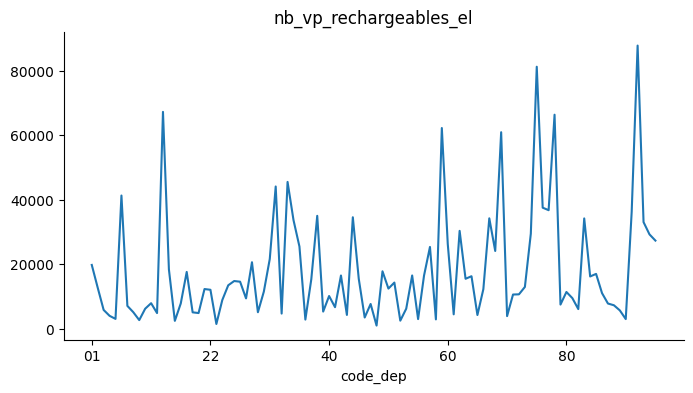

In [22]:
resultat['nb_vp_rechargeables_el'].plot(kind='line', figsize=(8, 4), title='nb_vp_rechargeables_el')
plt.gca().spines[['top', 'right']].set_visible(False)

In [23]:
unique_values = vehicules['code_dep'].unique()
print(unique_values)
print(len(unique_values))

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29' '2A' '2B'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85'
 '86' '87' '88' '89' '90' '91' '92' '93' '94' '95']
96


In [24]:
df_merged['Departement'] = df_merged['Departement'].fillna(
    df_merged['Code INSEE'].astype(str).str[:2]
)

df_merged.head()

nom_amenageur  siren_amenageur           contact_amenageur  \
0  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   
1  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   
2  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   
3  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   
4  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   

     nom_operateur           contact_operateur telephone_operateur  \
0  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   
1  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   
2  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   
3  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   
4  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   

      nom_enseigne id_station_itinerance id_station_local      nom_station  \
0  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   
1  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   
2  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   
3  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   
4  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   

   ... coord_long  coord_lat CodePostal Departement     Region   Annee  \
0  ...   1.407644  43.628261    31100.0        31.0  Occitanie  2024.0   
1  ...   1.407644  43.628261    31100.0        31.0  Occitanie  2024.0   
2  ...   1.407644  43.628261    31100.0        31.0  Occitanie  2024.0   
3  ...   1.407644  43.628261    31100.0        31.0  Occitanie  2024.0   
4  ...   1.407644  43.628261    31100.0        31.0  Occitanie  2024.0   

                     geometry   commune Code INSEE Code Région  
0  POINT (1.407644 43.628261)  Toulouse      31555        76.0  
1  POINT (1.407644 43.628261)  Toulouse      31555        76.0  
2  POINT (1.407644 43.628261)  Toulouse      31555        76.0  
3  POINT (1.407644 43.628261)  Toulouse      31555        76.0  
4  POINT (1.407644 43.628261)  Toulouse      31555        76.0  

[5 rows x 61 columns]

Il nous manquait des valeurs de code département donc on à utilisé leurs code INSEE pour les récupérer

In [25]:
lignes_nulles = df_merged[df_merged['Departement'].isnull()]
lignes_nulles

Empty DataFrame
Columns: [nom_amenageur, siren_amenageur, contact_amenageur, nom_operateur, contact_operateur, telephone_operateur, nom_enseigne, id_station_itinerance, id_station_local, nom_station, implantation_station, adresse_station, code_insee_commune, coordonneesXY, nbre_pdc, id_pdc_itinerance, id_pdc_local, puissance_nominale, prise_type_ef, prise_type_2, prise_type_combo_ccs, prise_type_chademo, prise_type_autre, gratuit, paiement_acte, paiement_cb, paiement_autre, tarification, condition_acces, reservation, horaires, accessibilite_pmr, restriction_gabarit, station_deux_roues, raccordement, num_pdl, date_mise_en_service, observations, date_maj, cable_t2_attache, last_modified, datagouv_dataset_id, datagouv_resource_id, datagouv_organization_or_owner, created_at, consolidated_longitude, consolidated_latitude, consolidated_code_postal, consolidated_commune, consolidated_is_lon_lat_correct, consolidated_is_code_insee_verified, coord_long, coord_lat, CodePostal, Departement, Region, Annee, geometry, commune, Code INSEE, Code Région]
Index: []

[0 rows x 61 columns]

Certaine ligne n'avait toujours pas de département donc on a utilisé la commune pour leurs donner leurs département

In [26]:
communes_dep = {
    "Lyon" : "69",
    "Paris" : "75",
    "Marseille" : "13",
    "Lille" : "59",
}

# Création de la nouvelle colonne 'cod_reg'
df_merged.loc[df_merged['commune'] == "Lyon", 'Departement'] = 69
df_merged.loc[df_merged['commune'] == "Paris", 'Departement'] = 75
df_merged.loc[df_merged['commune'] == "Marseille", 'Departement'] = 13
df_merged.loc[df_merged['commune'] == "Lille", 'Departement'] = 59


lignes_nulles = df_merged[df_merged['Departement'] == 'na']
lignes_nulles


nom_amenageur  siren_amenageur                contact_amenageur  \
45898  CSE-Central BDF      775657463.0  jacky.degroise@banque-france.fr   
45899  CSE-Central BDF      775657463.0  jacky.degroise@banque-france.fr   
95932          DRIVECO              NaN              support@driveco.com   
95933          DRIVECO              NaN              support@driveco.com   
95934          DRIVECO              NaN              support@driveco.com   
95935          DRIVECO              NaN              support@driveco.com   

      nom_operateur          contact_operateur telephone_operateur  \
45898           NVH  supervision@nvh-france.fr           972626373   
45899           NVH  supervision@nvh-france.fr           972626373   
95932       DRIVECO        support@driveco.com                 NaN   
95933       DRIVECO        support@driveco.com                 NaN   
95934       DRIVECO        support@driveco.com                 NaN   
95935       DRIVECO        support@driveco.com                 NaN   

          nom_enseigne  id_station_itinerance id_station_local  \
45898  CSE-Central BDF       FRLMSE1000100980                0   
45899  CSE-Central BDF       FRLMSE1000100981                0   
95932          DRIVECO  FRSSDPPAUTRICBMW16201              NaN   
95933          DRIVECO  FRSSDPPAUTRICBMW16201              NaN   
95934          DRIVECO  FRSSDPPAUTRICBMW16201              NaN   
95935          DRIVECO  FRSSDPPAUTRICBMW16201              NaN   

                  nom_station  ... coord_long  coord_lat CodePostal  \
45898  CSE - BdF - Concarneau  ...  -3.930000  47.870000        NaN   
45899  CSE - BdF - Concarneau  ...  -3.930000  47.870000        NaN   
95932         BMW - Drogenbos  ...   4.308821  50.790676        NaN   
95933         BMW - Drogenbos  ...   4.308821  50.790676        NaN   
95934         BMW - Drogenbos  ...   4.308821  50.790676        NaN   
95935         BMW - Drogenbos  ...   4.308821  50.790676        NaN   

      Departement  Region   Annee                    geometry  commune  \
45898          na     NaN  2022.0         POINT (-3.93 47.87)      NaN   
45899          na     NaN  2022.0         POINT (-3.93 47.87)      NaN   
95932          na     NaN  2023.0  POINT (4.308821 50.790676)      NaN   
95933          na     NaN  2023.0  POINT (4.308821 50.790676)      NaN   
95934          na     NaN  2023.0  POINT (4.308821 50.790676)      NaN   
95935          na     NaN  2023.0  POINT (4.308821 50.790676)      NaN   

      Code INSEE Code Région  
45898        NaN         NaN  
45899        NaN         NaN  
95932        NaN         NaN  
95933        NaN         NaN  
95934        NaN         NaN  
95935        NaN         NaN  

[6 rows x 61 columns]

In [27]:
df_merged = df_merged[df_merged['Departement'] != 'na']
df_merged['Departement'] = df_merged['Departement'].astype(str)

<ipython-input-27-082d193a6b71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Departement'] = df_merged['Departement'].astype(str)


In [28]:
# Convertir toutes les valeurs de 'Departement' en chaîne de caractères
df_merged['Departement'] = df_merged['Departement'].astype(str)

# Supprimer les '.0' à la fin des valeurs de 'Departement'
df_merged['Departement'] = df_merged['Departement'].str.replace(r'\.0$', '', regex=True)

# Ajouter un zéro devant les départements de 1 à 9
df_merged['Departement'] = df_merged['Departement'].apply(lambda x: x.zfill(2))

<ipython-input-28-79e273aad41c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Departement'] = df_merged['Departement'].astype(str)
<ipython-input-28-79e273aad41c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Departement'] = df_merged['Departement'].str.replace(r'\.0$', '', regex=True)
<ipython-input-28-79e273aad41c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

Comme il y avait plusieurs type dans la colonne Département on a du changer les types pour avoir seulement que les départements en string

In [29]:
df_merged.loc[df_merged['Departement'] == '20', 'Departement'] = df_merged['Code INSEE'].str[:2]

Cette fois on avait 97 départements car certain était noté 20 donc on a fait une liaison avec le code INSEE

In [30]:
df_merged = df_merged.dropna(subset=['Departement'])

In [31]:
lignes_nulles = df_merged[df_merged['Departement'].isnull()]
lignes_nulles

Empty DataFrame
Columns: [nom_amenageur, siren_amenageur, contact_amenageur, nom_operateur, contact_operateur, telephone_operateur, nom_enseigne, id_station_itinerance, id_station_local, nom_station, implantation_station, adresse_station, code_insee_commune, coordonneesXY, nbre_pdc, id_pdc_itinerance, id_pdc_local, puissance_nominale, prise_type_ef, prise_type_2, prise_type_combo_ccs, prise_type_chademo, prise_type_autre, gratuit, paiement_acte, paiement_cb, paiement_autre, tarification, condition_acces, reservation, horaires, accessibilite_pmr, restriction_gabarit, station_deux_roues, raccordement, num_pdl, date_mise_en_service, observations, date_maj, cable_t2_attache, last_modified, datagouv_dataset_id, datagouv_resource_id, datagouv_organization_or_owner, created_at, consolidated_longitude, consolidated_latitude, consolidated_code_postal, consolidated_commune, consolidated_is_lon_lat_correct, consolidated_is_code_insee_verified, coord_long, coord_lat, CodePostal, Departement, Region, Annee, geometry, commune, Code INSEE, Code Région]
Index: []

[0 rows x 61 columns]

In [32]:
unique_values = df_merged['Departement'].unique()
print(unique_values)
print(len(unique_values))

['31' '61' '18' '37' '40' '72' '34' '94' '2A' '13' '69' '59' '95' '77'
 '74' '73' '29' '62' '51' '60' '54' '57' '80' '68' '55' '67' '42' '45'
 '56' '63' '08' '25' '21' '70' '90' '88' '89' '44' '06' '30' '78' '83'
 '84' '92' '05' '11' '17' '26' '33' '35' '01' '71' '91' '15' '93' '22'
 '50' '12' '03' '81' '02' '64' '16' '87' '49' '85' '79' '27' '38' '24'
 '76' '14' '10' '58' '19' '04' '28' '41' '66' '53' '36' '23' '32' '47'
 '65' '82' '86' '43' '46' '75' '07' '09' '2B' '39' '52' '48']
96


In [33]:
# Chemin d'enregistrement sur Colab
chemin_csv = "/content/borne3.csv"

# Exporter le DataFrame en CSV
df_merged.to_csv(chemin_csv, index=False, sep=';')

print(f"Fichier CSV exporté avec succès à : {chemin_csv}")


Fichier CSV exporté avec succès à : /content/borne3.csv


In [34]:
from google.colab import files

# Télécharger le fichier
files.download(chemin_csv)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
resultat3=df_merged.groupby('Departement')['Departement'].count()
resultat3.name = 'nb_bornes'
resultat3 = resultat3.reset_index()
resultat3

Departement  nb_bornes
0           01        825
1           02        752
2           03        653
3           04        395
4           05        389
..         ...        ...
91          91       1609
92          92       2537
93          93       1399
94          94       1729
95          95       1522

[96 rows x 2 columns]

On a donc bien au final le nombre de borne par département

In [36]:
merged_df_2 = pd.merge(resultat3, resultat, left_on='Departement', right_on='code_dep', how='left')

departement_mapping = {
    "01": "Ain", "02": "Aisne", "03": "Allier", "04": "Alpes de Haute-Provence",
    "05": "Hautes-Alpes", "06": "Alpes-Maritimes", "07": "Ardêche", "08": "Ardennes",
    "09": "Ariège", "10": "Aube", "11": "Aude", "12": "Aveyron", "13": "Bouches-du-Rhône",
    "14": "Calvados", "15": "Cantal", "16": "Charente", "17": "Charente-Maritime",
    "18": "Cher", "19": "Corrèze", "2A": "Corse-du-Sud", "2B": "Haute-Corse", "21": "Côte-d'Or",
    "22": "Côtes d'Armor", "23": "Creuse", "24": "Dordogne", "25": "Doubs", "26": "Drôme",
    "27": "Eure", "28": "Eure-et-Loir", "29": "Finistère", "30": "Gard", "31": "Haute-Garonne",
    "32": "Gers", "33": "Gironde", "34": "Hérault", "35": "Îlle-et-Vilaine", "36": "Indre",
    "37": "Indre-et-Loire", "38": "Isère", "39": "Jura", "40": "Landes", "41": "Loir-et-Cher",
    "42": "Loire", "43": "Haute-Loire", "44": "Loire-Atlantique", "45": "Loiret", "46": "Lot",
    "47": "Lot-et-Garonne", "48": "Lozère", "49": "Maine-et-Loire", "50": "Manche", "51": "Marne",
    "52": "Haute-Marne", "53": "Mayenne", "54": "Meurthe-et-Moselle", "55": "Meuse", "56": "Morbihan",
    "57": "Moselle", "58": "Nièvre", "59": "Nord", "60": "Oise", "61": "Orne", "62": "Pas-de-Calais",
    "63": "Puy-de-Dôme", "64": "Pyrénées-Atlantiques", "65": "Hautes-Pyrénées", "66": "Pyrénées-Orientales",
    "67": "Bas-Rhin", "68": "Haut-Rhin", "69": "Rhône", "70": "Haute-Saône", "71": "Saône-et-Loire",
    "72": "Sarthe", "73": "Savoie", "74": "Haute-Savoie", "75": "Paris", "76": "Seine-Maritime",
    "77": "Seine-et-Marne", "78": "Yvelines", "79": "Deux-Sèvres", "80": "Somme", "81": "Tarn",
    "82": "Tarn-et-Garonne", "83": "Var", "84": "Vaucluse", "85": "Vendée", "86": "Vienne",
    "87": "Haute-Vienne", "88": "Vosges", "89": "Yonne", "90": "Territoire-de-Belfort", "91": "Essonne",
    "92": "Hauts-de-Seine", "93": "Seine-Saint-Denis", "94": "Val-de-Marne", "95": "Val-d'Oise"
}

# Creating the new  column
merged_df_2['Nom Departement'] = merged_df_2['Departement'].map(departement_mapping)

merged_df_2

Departement  nb_bornes  nb_vp_rechargeables_el          Nom Departement
0           01        825                   19746                      Ain
1           02        752                   12682                    Aisne
2           03        653                    5788                   Allier
3           04        395                    3964  Alpes de Haute-Provence
4           05        389                    3013             Hautes-Alpes
..         ...        ...                     ...                      ...
91          91       1609                   36176                  Essonne
92          92       2537                   87761           Hauts-de-Seine
93          93       1399                   33018        Seine-Saint-Denis
94          94       1729                   29222             Val-de-Marne
95          95       1522                   27292               Val-d'Oise

[96 rows x 4 columns]

On ajoute le Nom de chaque département pour avoir une meilleure visibilité

In [37]:
resultat3.sum()

Departement    0102030405060708091011121314151617181921222324...
nb_bornes                                                 109672
dtype: object

In [38]:
df_merged.head()

nom_amenageur  siren_amenageur           contact_amenageur  \
0  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   
1  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   
2  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   
3  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   
4  SOLVEO ENERGIES      508886132.0  bornes@solveo-energies.com   

     nom_operateur           contact_operateur telephone_operateur  \
0  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   
1  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   
2  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   
3  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   
4  SOLVEO ENERGIES  bornes@solveo-energies.com      05 32 98 01 58   

      nom_enseigne id_station_itinerance id_station_local      nom_station  \
0  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   
1  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   
2  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   
3  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   
4  SOLVEO ENERGIES         DKMONE3785539              NaN  Golf de Garonne   

   ... coord_long  coord_lat CodePostal Departement     Region   Annee  \
0  ...   1.407644  43.628261    31100.0          31  Occitanie  2024.0   
1  ...   1.407644  43.628261    31100.0          31  Occitanie  2024.0   
2  ...   1.407644  43.628261    31100.0          31  Occitanie  2024.0   
3  ...   1.407644  43.628261    31100.0          31  Occitanie  2024.0   
4  ...   1.407644  43.628261    31100.0          31  Occitanie  2024.0   

                     geometry   commune Code INSEE Code Région  
0  POINT (1.407644 43.628261)  Toulouse      31555        76.0  
1  POINT (1.407644 43.628261)  Toulouse      31555        76.0  
2  POINT (1.407644 43.628261)  Toulouse      31555        76.0  
3  POINT (1.407644 43.628261)  Toulouse      31555        76.0  
4  POINT (1.407644 43.628261)  Toulouse      31555        76.0  

[5 rows x 61 columns]

#Graph

##Région

In [ ]:
# Données
data1 = {
    "Code Région": [11.0, 24.0, 27.0, 28.0, 32.0, 44.0, 52.0, 53.0, 75.0, 76.0, 84.0, 93.0, 94.0],
    "Nombre bornes": [19365, 4460, 4652, 5781, 9249, 10299, 5731, 4830, 11511, 11370, 12302, 9622, 502],
}

data2 = {
    "code_region": [11, 24, 27, 28, 32, 44, 52, 53, 75, 76, 84, 93, 94],
    "nb_vp_rechargeables_el": [397723, 54618, 56900, 87246, 146090, 140554, 86077, 74511, 146228, 156629, 236973, 188779, 16547],
}

# Création des DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Conversion de "Code Région" en int pour correspondre à "code_region"
df1["Code Région"] = df1["Code Région"].astype(int)

# Fusion des deux DataFrames
resultatF = pd.merge(df1, df2, left_on="Code Région", right_on="code_region", how="inner")
resultatF = resultatF.drop(columns=["code_region"])
# Ajouter la colonne "Ratio"
resultatF["Ratio"] = resultatF["nb_vp_rechargeables_el"] / resultatF["Nombre bornes"]
resultatF

Code Région  Nombre bornes  nb_vp_rechargeables_el      Ratio
0            11          19365                  397723  20.538239
1            24           4460                   54618  12.246188
2            27           4652                   56900  12.231298
3            28           5781                   87246  15.091853
4            32           9249                  146090  15.795221
5            44          10299                  140554  13.647344
6            52           5731                   86077  15.019543
7            53           4830                   74511  15.426708
8            75          11511                  146228  12.703327
9            76          11370                  156629  13.775638
10           84          12302                  236973  19.262965
11           93           9622                  188779  19.619518
12           94            502                   16547  32.962151

Le ratio est le nombre de voiture par borne dans chaque région

In [ ]:
# Dictionnaire de correspondance des codes régionaux aux noms des régions
region_mapping = {
    11: "ILE DE FRANCE",
    24: "CENTRE VAL DE LOIRE",
    27: "BOURGOGNE FRANCHE COMTE",
    28: "NORMANDIE",
    32: "HAUTS DE FRANCE",
    44: "GRAND EST",
    52: "PAYS DE LA LOIRE",
    53: "BRETAGNE",
    75: "NOUVELLE AQUITAINE",
    76: "OCCITANIE",
    84: "AUVERGNE RHONE ALPES",
    93: "PROVENCE ALPES COTE D AZUR",
    94: "CORSE"
}

# Ajout de la colonne 'region' au dataframe
resultatF['region'] = resultatF['Code Région'].map(region_mapping)
resultatF.head()

Code Région  Nombre bornes  nb_vp_rechargeables_el      Ratio  \
0           11          19365                  397723  20.538239   
1           24           4460                   54618  12.246188   
2           27           4652                   56900  12.231298   
3           28           5781                   87246  15.091853   
4           32           9249                  146090  15.795221   

                    region  
0            ILE DE FRANCE  
1      CENTRE VAL DE LOIRE  
2  BOURGOGNE FRANCHE COMTE  
3                NORMANDIE  
4          HAUTS DE FRANCE

On ajoute la liaison entre le code region et le nom de la région pour avoir une meilleure visibilité

In [ ]:
# Créer un scatter plot
fig = px.scatter(
    resultatF,
    x='Nombre bornes',
    hover_data=['Code Région', 'region'],
    y='nb_vp_rechargeables_el',
    size_max=32,  # contrôle la taille maximale des points
    opacity=0.8  # alpha des points

)

# Modifier les axes et supprimer les spines supérieur et droit
fig.update_layout(
    xaxis=dict(showline=True, linewidth=1, linecolor='black', showgrid=False),
    yaxis=dict(showline=True, linewidth=1, linecolor='black', showgrid=False),
    showlegend=False,  # cacher la légende si non nécessaire
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.update_xaxes(showspikes=False)
fig.update_yaxes(showspikes=False)

# Afficher le graphique
fig.show()

Diagramme du nombre de bornes en fonction du nombre de voiture éléctrique pour chaque région

In [ ]:
# Créer un scatter plot
fig = px.scatter(
    resultatF,
    x='region',
    y='Ratio',
    opacity=0.8,  # alpha
    size_max=32   # Taille des points si nécessaire
)

# Ajouter une ligne horizontale rouge
fig.add_shape(
    type='line',
    x0=-0.5, x1=len(resultatF) - 0.5,
    y0=10, y1=10,
    line=dict(color='red', dash='dash', width=1.5),
    xref='x', yref='y'
)

# Ajuster la rotation des étiquettes de l'axe des x
fig.update_xaxes(
    tickangle=45,
    tickmode='array',
    tickvals=list(range(len(resultatF))),
    ticktext=resultatF['region']
)

# Ajouter des marges et labels
fig.update_layout(
    xaxis_title="Régions",
    yaxis_title="Ratio",
    margin=dict(l=40, r=20, t=20, b=80),
    xaxis=dict(showline=True, linewidth=1, linecolor='black'),
    yaxis=dict(showline=True, linewidth=1, linecolor='black'),
    showlegend=False
)

# Afficher le graphique
fig.show()

On observe que dans chaque région il y a bien plus de voiture éléctrique que l'objectif

In [ ]:
# Calculate the ratio
resultatF['Calculated Ratio Condition'] = resultatF['Nombre bornes'] / (resultatF['nb_vp_rechargeables_el'] / 10)

# Check if the condition is met condition
resultatF['Meets Condition'] = resultatF['Calculated Ratio Condition'] >= 1

resultatF['Required Nombre bornes'] = np.ceil(resultatF['nb_vp_rechargeables_el'] / 10).astype(int)

# Calculate the number of "bornes manquantes"
resultatF['Bornes Manquantes'] = (resultatF['Required Nombre bornes'] - resultatF['Nombre bornes']).clip(lower=0)

resultatF

Code Région  Nombre bornes  nb_vp_rechargeables_el      Ratio  \
0            11          19365                  397723  20.538239   
1            24           4460                   54618  12.246188   
2            27           4652                   56900  12.231298   
3            28           5781                   87246  15.091853   
4            32           9249                  146090  15.795221   
5            44          10299                  140554  13.647344   
6            52           5731                   86077  15.019543   
7            53           4830                   74511  15.426708   
8            75          11511                  146228  12.703327   
9            76          11370                  156629  13.775638   
10           84          12302                  236973  19.262965   
11           93           9622                  188779  19.619518   
12           94            502                   16547  32.962151   

                        region  Calculated Ratio Condition  Meets Condition  \
0                ILE DE FRANCE                    0.486897            False   
1          CENTRE VAL DE LOIRE                    0.816581            False   
2      BOURGOGNE FRANCHE COMTE                    0.817575            False   
3                    NORMANDIE                    0.662609            False   
4              HAUTS DE FRANCE                    0.633103            False   
5                    GRAND EST                    0.732743            False   
6             PAYS DE LA LOIRE                    0.665799            False   
7                     BRETAGNE                    0.648226            False   
8           NOUVELLE AQUITAINE                    0.787195            False   
9                    OCCITANIE                    0.725919            False   
10        AUVERGNE RHONE ALPES                    0.519131            False   
11  PROVENCE ALPES COTE D AZUR                    0.509697            False   
12                       CORSE                    0.303378            False   

    Required Nombre bornes  Bornes Manquantes  
0                    39773              20408  
1                     5462               1002  
2                     5690               1038  
3                     8725               2944  
4                    14609               5360  
5                    14056               3757  
6                     8608               2877  
7                     7452               2622  
8                    14623               3112  
9                    15663               4293  
10                   23698              11396  
11                   18878               9256  
12                    1655               1153

In [ ]:
# Create a stacked horizontal bar chart
fig = px.bar(
    resultatF,
    y="region",
    x=["Nombre bornes", "Bornes Manquantes"],
    title="Nombre de Bornes et Bornes Manquantes par Région",
    labels={"value": "Nombre", "": "Région"},
    color_discrete_sequence=["blue", "red"],  # Colors for the two variables
    orientation="h",
)

# Update layout for better visualization
fig.update_layout(
    barmode="stack",
    xaxis_title="Nombre de Bornes",
    yaxis_title="Code Région",
)

# Show the plot
fig.show()

Visualisation du nombre de bornes déja présente et celle qu'il manque pour satisfaire l'objectif

##Departement

In [ ]:
merged_df_2["Ratio vehicules par bornes"] = merged_df_2["nb_vp_rechargeables_el"] / merged_df_2["nb_bornes"]

fig = px.scatter(
    merged_df_2,
    x="nb_bornes",
    y="nb_vp_rechargeables_el",
    hover_data=["Departement", "Nom Departement"],
    size=None,
    opacity=0.8,
    title="Relation entre le nombre de bornes et de véhicules rechargeables",
    labels={
        "nb_bornes": "Nombre de Bornes",
        "nb_vp_rechargeables_el": "Nombre de Véhicules Rechargeables",
    },
)

fig.update_layout(
    xaxis_title="Nombre de Bornes",
    yaxis_title="Nombre de Véhicules Rechargeables",
    showlegend=False,
)

fig.show()

Diagramme du nombre de bornes en fonction du nombre de voiture éléctrique pour chaque département

In [ ]:
fig = px.scatter(
    merged_df_2,
    x="Nom Departement",
    y="Ratio vehicules par bornes",
    title="Ratio Véhicules par Bornes par Département",
    labels={
        "Departement": "Département",
        "Ratio vehicules par bornes": "Ratio Véhicules par Bornes",
    },
    opacity=0.8,
)

fig.add_shape(
    type="line",
    x0=0, x1=1, y0=10, y1=10,
    xref="paper",
    yref="y",
    line=dict(color="red", dash="dash", width=1.5),
    name="y = 10",
)


fig.update_layout(
    xaxis=dict(tickangle=90),
    margin=dict(b=100),
    xaxis_title="Département",
    yaxis_title="Ratio Véhicules par Bornes",
)

fig.show()

On observe que dans chaque département il y a bien plus de voiture éléctrique que l'objectif

In [ ]:
merged_df_2

Departement  nb_bornes  nb_vp_rechargeables_el          Nom Departement  \
0           01        825                   19746                      Ain   
1           02        752                   12682                    Aisne   
2           03        653                    5788                   Allier   
3           04        395                    3964  Alpes de Haute-Provence   
4           05        389                    3013             Hautes-Alpes   
..         ...        ...                     ...                      ...   
91          91       1609                   36176                  Essonne   
92          92       2537                   87761           Hauts-de-Seine   
93          93       1399                   33018        Seine-Saint-Denis   
94          94       1729                   29222             Val-de-Marne   
95          95       1522                   27292               Val-d'Oise   

    Ratio vehicules par bornes  
0                    23.934545  
1                    16.864362  
2                     8.863706  
3                    10.035443  
4                     7.745501  
..                         ...  
91                   22.483530  
92                   34.592432  
93                   23.601144  
94                   16.901099  
95                   17.931669  

[96 rows x 5 columns]

In [ ]:
merged_df_2['Calculated Ratio Condition'] = merged_df_2['nb_bornes'] / (merged_df_2['nb_vp_rechargeables_el'] / 10)

merged_df_2['Meets Condition'] = merged_df_2['Calculated Ratio Condition'] >= 1

merged_df_2['Required Nombre bornes'] = np.ceil(merged_df_2['nb_vp_rechargeables_el'] / 10).astype(int)

merged_df_2['Bornes Manquantes'] = (merged_df_2['Required Nombre bornes'] - merged_df_2['nb_bornes']).clip(lower=0)

fig = px.bar(
    merged_df_2,
    y="Nom Departement",
    hover_data=['Nom Departement', 'Departement'],
    x=["nb_bornes", "Bornes Manquantes"],
    title="Nombre de Bornes et Bornes Manquantes par Departement",
    labels={"value": "Nombre", "": "Departement"},
    color_discrete_sequence=["blue", "red"],
    orientation="h",
)

fig.update_layout(
    barmode="stack",
    xaxis_title="Nombre de Bornes",
    yaxis_title="Code Departement",
)

fig.show()

Visualisation du nombre de bornes déja présente et celle qu'il manque pour satisfaire l'objectif

In [ ]:

merged_df_2_sorted = merged_df_2.sort_values(by="Departement")

num_departments = len(merged_df_2_sorted)
chunk_size = 20
num_chunks = math.ceil(num_departments / chunk_size)

for i in range(num_chunks):
    chunk = merged_df_2_sorted.iloc[i * chunk_size:(i + 1) * chunk_size]

    fig = px.bar(
        chunk,
        y="Nom Departement",
        hover_data=['Nom Departement', 'Departement'],
        x=["nb_bornes", "Bornes Manquantes"],
        title=f"Nombre de Bornes et Bornes Manquantes (Departements {i * chunk_size + 1} to {(i + 1) * chunk_size})",
        labels={"value": "Nombre", "": "Departement"},
        color_discrete_sequence=["blue", "red"],
        orientation="h",
    )

    fig.update_layout(
        barmode="stack",
        xaxis_title="Nombre de Bornes",
        yaxis_title="Code Departement",
    )

    fig.show()

On l'a divisé pour mieux le visualiser

In [ ]:
condition_true = merged_df_2[merged_df_2['Meets Condition'] == True]

fig = px.bar(
    condition_true,
    y="Nom Departement",
    hover_data=['Nom Departement', 'Departement'],
    x=["nb_bornes", "Bornes Manquantes"],
    title="Nombre de Bornes et Bornes Manquantes par Departement",
    labels={"value": "Nombre", "": "Departement"},
    color_discrete_sequence=["blue", "red"],
    orientation="h",
)

fig.update_layout(
    barmode="stack",
    xaxis_title="Nombre de Bornes",
    yaxis_title="Code Departement",
)

fig.show()

Les départements qui valide déja le critère des une borne pour dix voiture

In [ ]:
condition_false = merged_df_2[merged_df_2['Meets Condition'] != True]

num_departments = len(condition_false)
chunk_size = 20
num_chunks = math.ceil(num_departments / chunk_size)

for i in range(num_chunks):
    chunk = condition_false.iloc[i * chunk_size:(i + 1) * chunk_size]

    fig = px.bar(
        chunk,
        y="Nom Departement",
        hover_data=['Nom Departement', 'Departement'],
        x=["nb_bornes", "Bornes Manquantes"],
        title=f"Nombre de Bornes et Bornes Manquantes)",
        labels={"value": "Nombre", "": "Departement"},
        color_discrete_sequence=["blue", "red"],
        orientation="h",
    )

    fig.update_layout(
        barmode="stack",
        xaxis_title="Nombre de Bornes",
        yaxis_title="Code Departement",
    )

    fig.show()

Et ceux qui ne le valide pas